In [2]:
import numpy as np
import matplotlib.pyplot as plt


**Fourier Transform of DC signal**


F{A} <------> A dirac_delta(f)

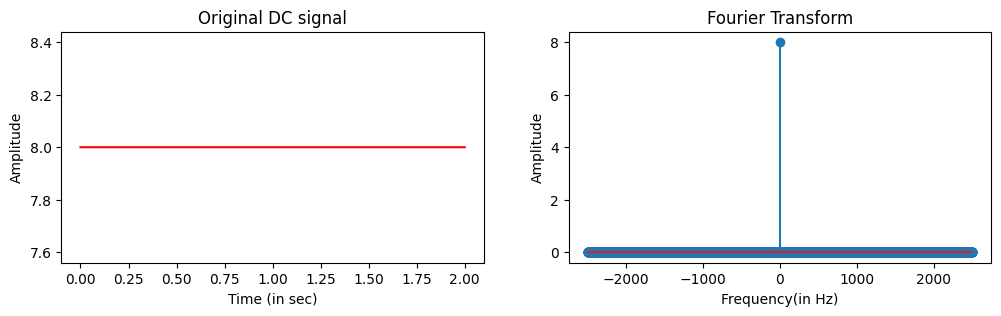

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 8          # DC value
sr = 5000      # Sampling rate
dur = 2        # Duration in seconds

# Generate time vector
t = np.linspace(0, dur, sr * dur)

# Create a DC signal with constant amplitude 'A'
DC_signal = [A] * len(t)

# Perform Discrete Fourier Transform (DFT)
dft_DC_signal = np.fft.fftshift(np.fft.fft(DC_signal))

# Generate frequency axis for the plot
freq = np.fft.fftshift(np.fft.fftfreq(len(dft_DC_signal), t[1] - t[0]))

# Plot the original DC signal
plt.figure(figsize=[12, 3])
plt.subplot(1, 2, 1)
plt.title("Original DC signal")
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.plot(t, DC_signal, color='red')

# Plot the Fourier transform
plt.subplot(1, 2, 2)
plt.title("Fourier Transform")
plt.xlabel("Frequency(in Hz)")
plt.ylabel("Amplitude")
plt.stem(freq, abs(dft_DC_signal) / (sr * dur))

# Display the plots
plt.show()


**FT of Impulse signal**

F{A.dirac_delta(t)} <-----> A

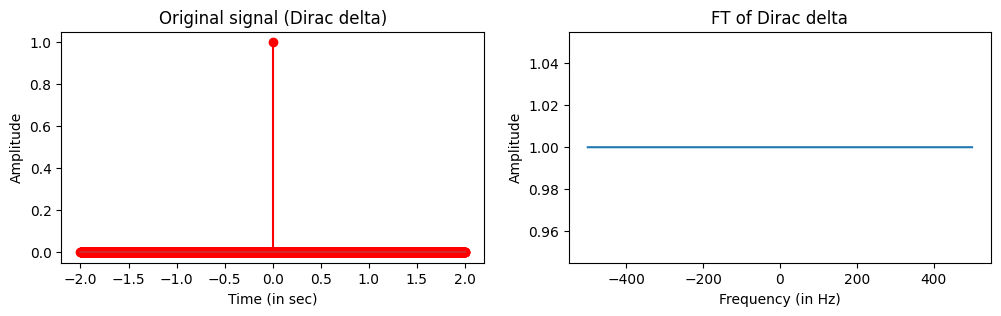

In [26]:

# Parameters
dur = 2         # Duration in seconds
sr = 1000       # Sampling rate in Hz
A = 1           # Amplitude of Dirac delta

# Time vector
t = np.linspace(-1 * dur, dur, sr * dur * 2)

# Create Dirac delta function
dirac_delta = np.zeros_like(t)
dirac_delta[len(dirac_delta)//2] = A  # Set the value at the middle index to the amplitude A

# Compute the Fourier transform of the Dirac delta
dft_dirac_delta = np.fft.fftshift(np.fft.fft(dirac_delta))
freq = np.fft.fftshift(np.fft.fftfreq(len(dirac_delta), 1/sr))

# Plot the original signal (Dirac delta) in the time domain
plt.figure(figsize=[12, 3])
plt.subplot(1, 2, 1)
plt.title("Original signal (Dirac delta)")
plt.ylabel("Amplitude")
plt.xlabel("Time (in sec)")
plt.stem(t, dirac_delta,linefmt="r-",markerfmt="r")

# Plot the Fourier transform of the Dirac delta in the frequency domain
plt.subplot(1, 2, 2)
plt.title("FT of Dirac delta")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, abs(dft_dirac_delta))
plt.show()


**FT of Exponential function**

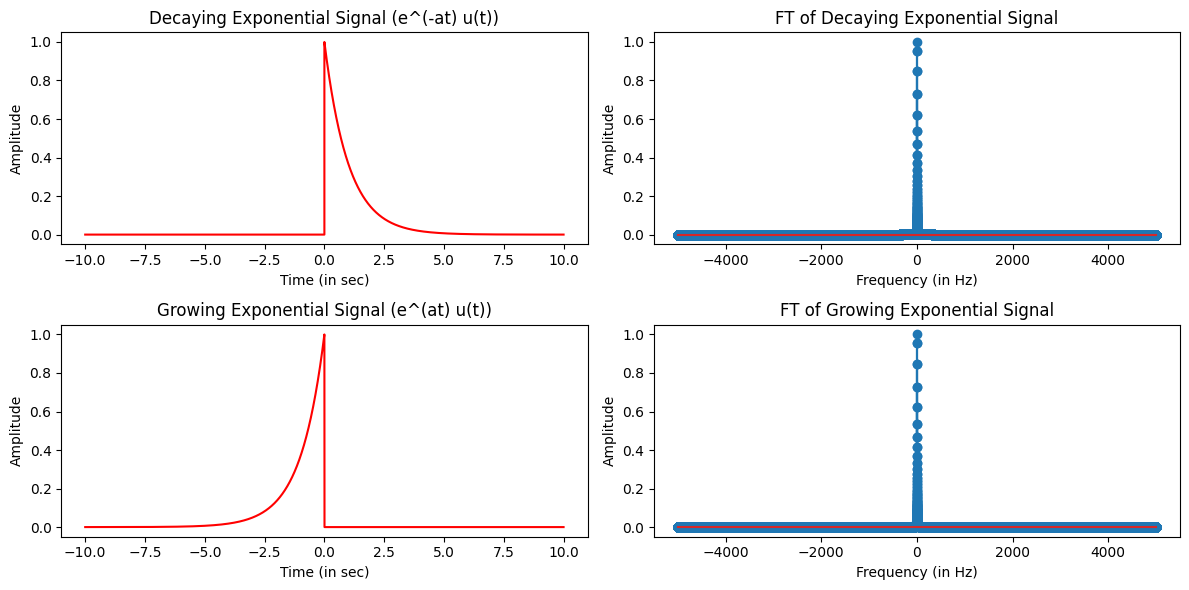

In [57]:
# Parameters
duration = 10         # Signal duration in seconds
sampling_rate = 10000  # Sampling rate in Hz
decay_rate = 1        

# Time vector for the decaying exponential signal
time_vector_decay = np.linspace(-duration, duration, sampling_rate * duration * 2)

# Generate the decaying exponential signal
decay_signal = []
for i in range(len(time_vector_decay)):
    if(time_vector_decay[i]>0):
        decay_signal.append(np.exp(-decay_rate * time_vector_decay[i]))
    else :
        decay_signal.append(0)



# Compute the Fourier transform of the decaying exponential signal
dft_decay_signal = np.fft.fftshift(np.fft.fft(decay_signal))
frequency_decay = np.fft.fftshift(np.fft.fftfreq(len(decay_signal), 1/sampling_rate))

# Plot the decaying exponential signal in the time domain
plt.figure(figsize=[12, 6])

plt.subplot(2, 2, 1)
plt.title("Decaying Exponential Signal (e^(-at) u(t))")
plt.ylabel("Amplitude")
plt.xlabel("Time (in sec)")
plt.plot(time_vector_decay, decay_signal, color="red")

# Plot the Fourier transform of the decaying exponential signal in the frequency domain
plt.subplot(2, 2, 2)
plt.title("FT of Decaying Exponential Signal")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
# plt.ylim(0,1)
plt.stem(frequency_decay, abs(dft_decay_signal)/sampling_rate)

# Time vector for the growing exponential signal
time_vector_growth = np.linspace(-duration, duration, sampling_rate * duration * 2)

# Generate the growing exponential signal
# growth_signal = np.exp(decay_rate * time_vector_growth)

growth_signal = []
for i in range(len(time_vector_growth)):
    if(time_vector_growth[i]<0):
        growth_signal.append(np.exp(decay_rate * time_vector_growth[i]))
    else :
        growth_signal.append(0)



# Compute the Fourier transform of the growing exponential signal
dft_growth_signal = np.fft.fftshift(np.fft.fft(growth_signal))
frequency_growth = np.fft.fftshift(np.fft.fftfreq(len(growth_signal), 1/sampling_rate))

# Plot the growing exponential signal in the time domain
plt.subplot(2, 2, 3)
plt.title("Growing Exponential Signal (e^(at) u(t))")
plt.ylabel("Amplitude")
plt.xlabel("Time (in sec)")
plt.plot(time_vector_growth, growth_signal, color="red")

# Plot the Fourier transform of the growing exponential signal in the frequency domain
plt.subplot(2, 2, 4)
plt.title("FT of Growing Exponential Signal")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
# plt.ylim(0,1)
plt.stem(frequency_growth, abs(dft_growth_signal)/sampling_rate)

plt.tight_layout()
plt.show()


**fourier Transform of Signum function**

X(f) = 1/(j.pi.f)

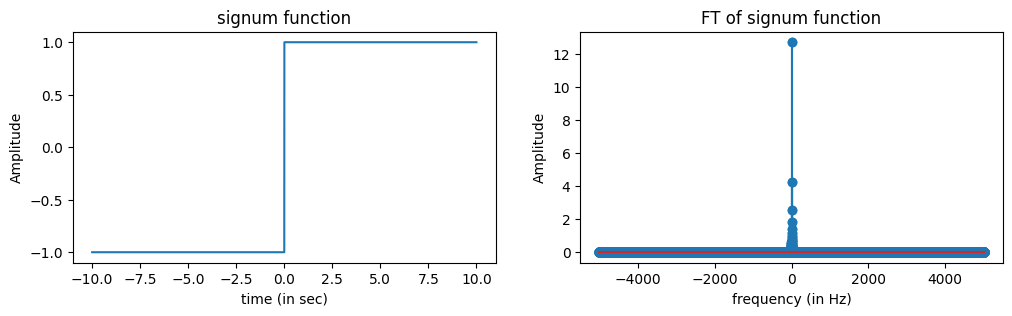

In [68]:

def sgn_fun(amp, t):
    # Function to generate signum function values for each element in time array
    sgn_t = []
    for i in range(len(t)):
        if(t[i] > 0):
            sgn_t.append(amp)
        elif(t[i] == 0):
            sgn_t.append(0)
        else:
            sgn_t.append(-amp)
    return sgn_t

# Parameters
dur = 10         # Duration in seconds
sr = 10000       # Sampling rate in Hz

# Time array
t = np.linspace(-dur, dur, sr * dur * 2 + 1)

# Generate signum function values
sgn_t = sgn_fun(1, t)

# Compute FFT of the signum function
fft_sgn_t = np.fft.fftshift(np.fft.fft(sgn_t))

# Frequency array for plotting the FFT
freq = np.fft.fftshift(np.fft.fftfreq(len(fft_sgn_t), 1/sr))

# Plotting the signum function and its FFT
plt.figure(figsize=[12, 3])

# Plotting the signum function
plt.subplot(1, 2, 1)
plt.title("Signum function")
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.plot(t, sgn_t)

# Plotting the FFT of the signum function
plt.subplot(1, 2, 2)
plt.title("FT of Signum function")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.stem(freq, np.abs(fft_sgn_t) / sr)  # Using stem plot for better visualization
plt.show()


**FT of unit-step function**


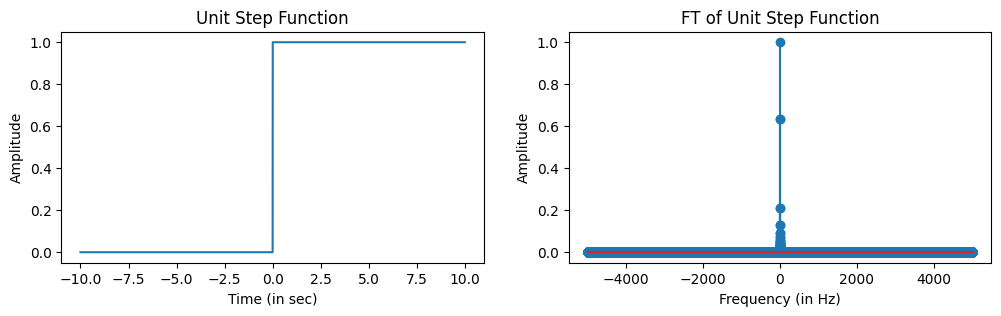

In [76]:

def ut_fun(A, time_array):
    # Function to generate unit step function values for each element in time array
    ut = []
    for i in range(len(time_array)):
        if(time_array[i] >= 0):
            ut.append(1)
        else:
            ut.append(0)
    return ut

# Parameters
dur = 10         # Duration in seconds
sr = 10000       # Sampling rate in Hz

# Time array
t = np.linspace(-dur, dur, dur * sr * 2 + 1)

# Generate unit step function values
u_t = ut_fun(1, t)

# Compute FFT of the unit step function
FT_u_t = np.fft.fftshift(np.fft.fft(u_t))

# Frequency array for plotting the FFT
freq = np.fft.fftshift(np.fft.fftfreq(len(FT_u_t), 1/sr))

# Plotting the unit step function and its FFT
plt.figure(figsize=[12, 3])

# Plotting the unit step function
plt.subplot(1, 2, 1)
plt.title("Unit Step Function")
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.plot(t, u_t)

# Plotting the FFT of the unit step function
plt.subplot(1, 2, 2)
plt.title("FT of Unit Step Function")
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.stem(freq, np.abs(FT_u_t) / (sr * dur))  # Using stem plot for better visualization
plt.show()
